# CS547 Group 17
Carlos Cuellar, Yuncong Geng, Kangcheng Lin, Peter Thompson
## HW6

In [1]:
import os
import numpy as np
import pandas
import time
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

In [194]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

# Problem 1

In [5]:
def func(x):
    return x**3-0.5*x**2


## 1) generate input data
Generate 1000 data points for x ranging from -5 to 5. 

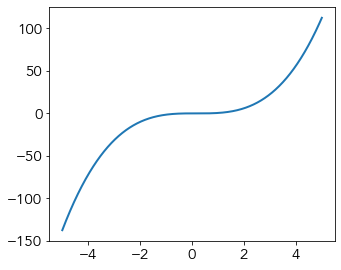

In [90]:
x = np.linspace(-5,5,1000)
y = func(x)

plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams.update({'font.size': 15})
plt.plot(x,y,**plotStyles)
plt.tight_layout()

In [91]:
inputs = Variable(torch.Tensor(x.reshape(1000,1)))
labels = Variable(torch.Tensor(y.reshape(1000,1)))

## 2) explore number of layers and layer sizes with sigmoidal activation

In [239]:
class SigmoidalFeedForward(nn.Module): 
    def __init__(self,layers_size,num_layers): 
        super(SigmoidalFeedForward, self).__init__() 
        self.layers_size = layers_size;
        self.num_layers = num_layers;
        self.layers = nn.ModuleList([nn.Linear(1, layers_size)])
        self.layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, self.num_layers-1)])
        self.layers.append(nn.Linear(layers_size, 1))
        self.relu=torch.nn.Sigmoid()

    def forward(self, x):
        out = x
        for i in range(len(self.layers)-1):
            out = self.layers[i](out)
            out=self.relu(out)
        out = self.layers[-1](out)
        return out

### test on two-layer network
The learning rate is set to be 0.01. 

The iteration stops when the loss is smaller than 10, or when the maximum number of iterations (20000) is reached. 

layers_size=1
#epoch=20000; loss=805
layers_size=2
#epoch=20000; loss=252
layers_size=3
#epoch=20000; loss=131
layers_size=4
#epoch=20000; loss=50
layers_size=5
#epoch=20000; loss=18
layers_size=6
#epoch=20000; loss=15
layers_size=7
#epoch=2882; loss=9
layers_size=8
#epoch=3816; loss=9
layers_size=9
#epoch=3698; loss=9
layers_size=10
#epoch=2410; loss=9
layers_size=11
#epoch=2519; loss=9
layers_size=12
#epoch=2408; loss=9


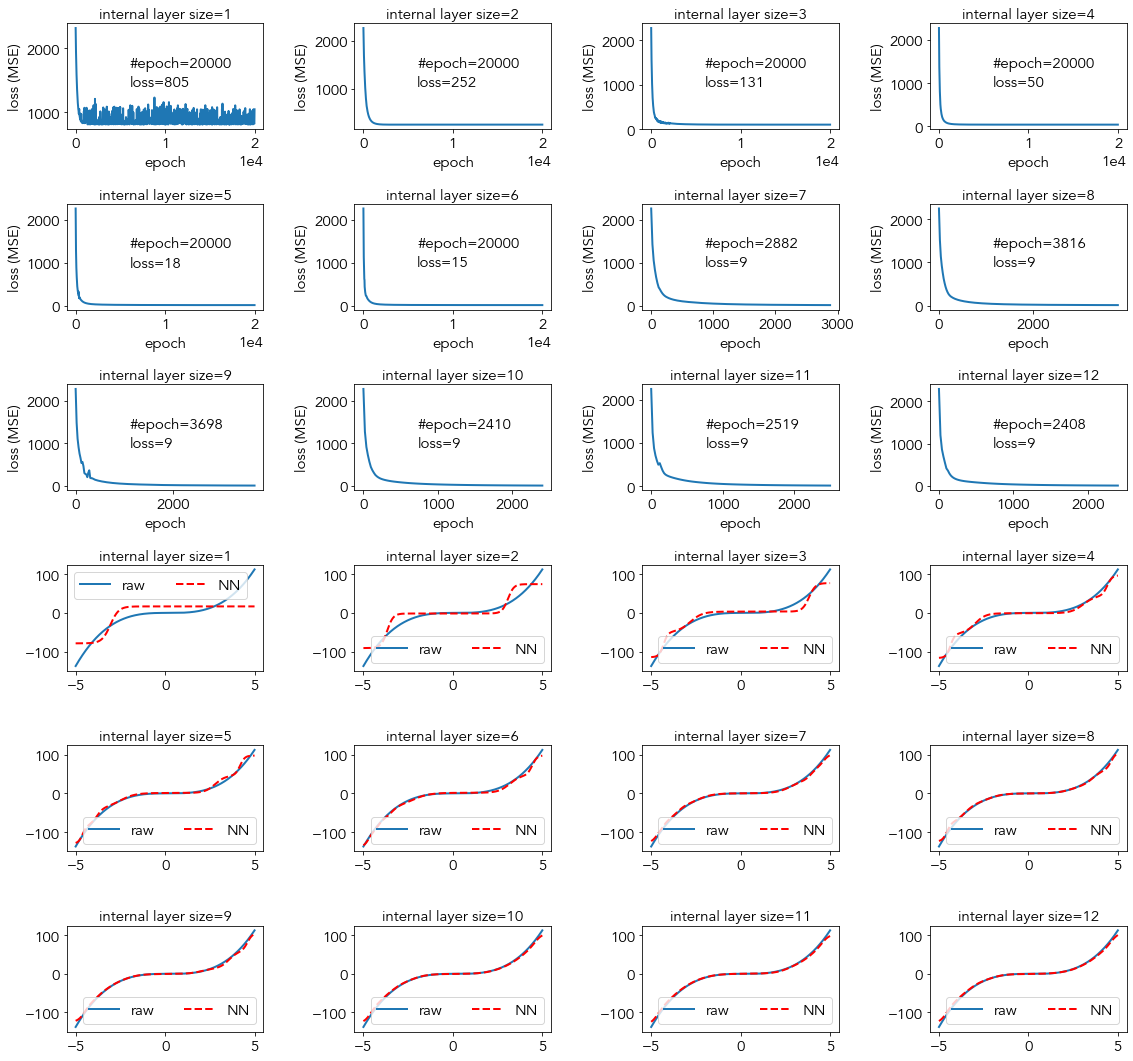

In [205]:
n_epoch_list = []

num_layers = 2;
learningRate = 0.01;
MAX_iter=20000;
plt.figure(figsize=(16,15))
for layers_size in range(1,13):
    print('layers_size='+str(layers_size))
    model=SigmoidalFeedForward(layers_size,num_layers)
    Loss = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
    tic=time.perf_counter()
    losses=[]
    n_epoch = MAX_iter;
    for ctr in range(MAX_iter):
        optimizer.zero_grad()
        outputs = model(inputs)
        lossvalue = Loss(outputs, labels)
        losses.append(lossvalue)
        if (lossvalue<10):
            n_epoch = ctr;
            break;
        else:
            lossvalue.backward()
            optimizer.step()
    print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))
    
    n_epoch_list.append(n_epoch)
    xdata = np.arange(0,n_epoch,20);
    ydata = losses[::20];
    
    plt.subplot(6,4,layers_size)
    plt.title('internal layer size='+str(layers_size))
    plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
    plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
    plt.plot(xdata,ydata,**plotStyles)
    plt.xlabel('epoch')
    plt.ylabel('loss (MSE)')
    
    plt.subplot(6,4,12+layers_size)
    outputs=model(inputs)
    plt.plot(x,y,linewidth=2,label='raw')
    plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
    plt.legend(ncol=2)
    plt.title('internal layer size='+str(layers_size))
plt.tight_layout()

### test on 3-layer network

layers_size=1
#epoch=20000; loss=820
layers_size=2
#epoch=20000; loss=214
layers_size=3
#epoch=20000; loss=56
layers_size=4
#epoch=20000; loss=11
layers_size=5
#epoch=13048; loss=9
layers_size=6
#epoch=7035; loss=9
layers_size=7
#epoch=5786; loss=9
layers_size=8
#epoch=8027; loss=9
layers_size=9
#epoch=4976; loss=9
layers_size=10
#epoch=5771; loss=9
layers_size=11
#epoch=4688; loss=9
layers_size=12
#epoch=4762; loss=9


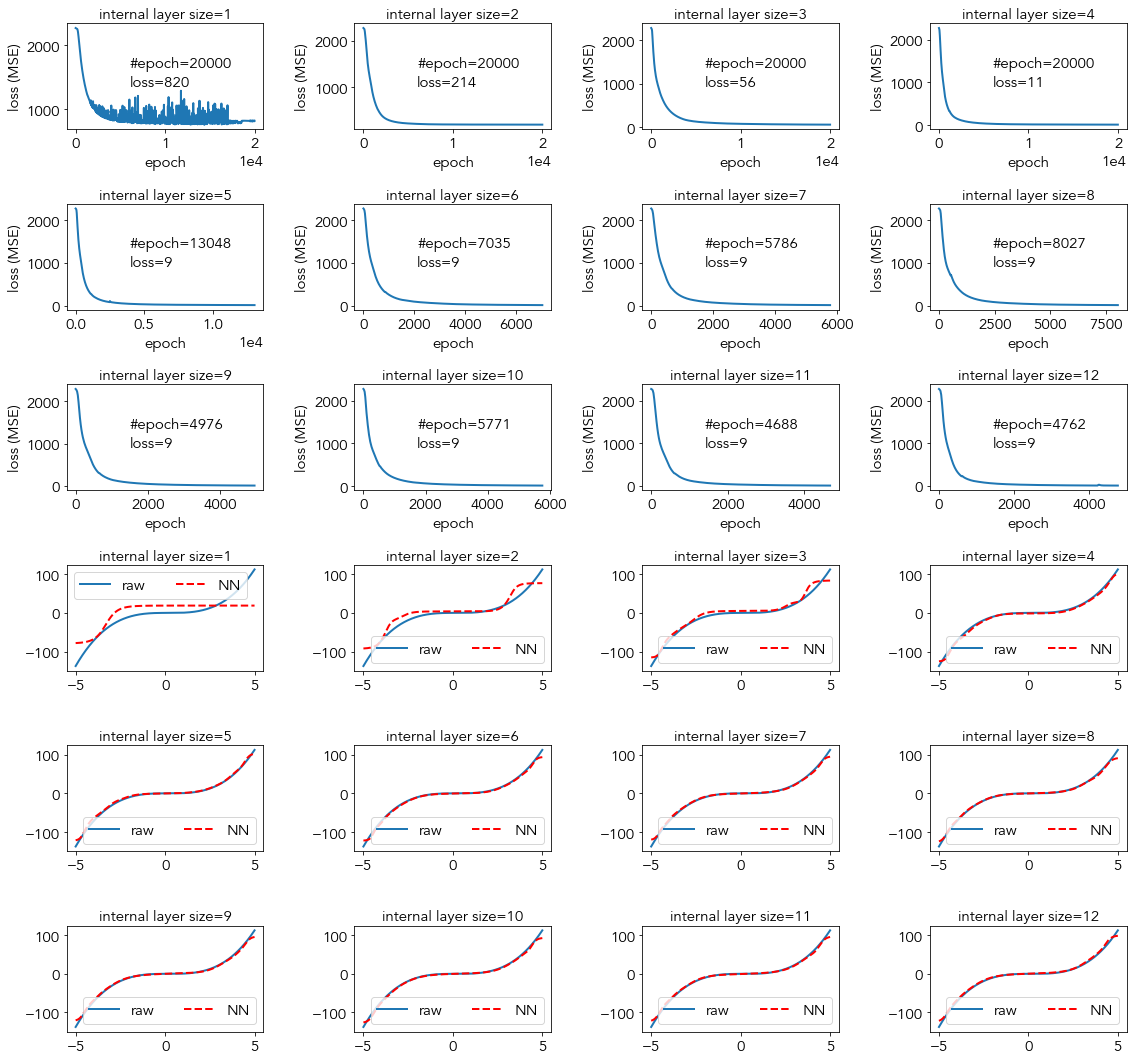

In [235]:
n_epoch_list2 = []

num_layers = 3;
learningRate = 0.002;
MAX_iter=20000;
plt.figure(figsize=(16,15))
for layers_size in range(1,13):
    print('layers_size='+str(layers_size))
    model=SigmoidalFeedForward(layers_size,num_layers)
    Loss = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
    tic=time.perf_counter()
    losses=[]
    n_epoch = MAX_iter;
    for ctr in range(MAX_iter):
        optimizer.zero_grad()
        outputs = model(inputs)
        lossvalue = Loss(outputs, labels)
        losses.append(lossvalue)
        if (lossvalue<10):
            n_epoch = ctr;
            break;
        else:
            lossvalue.backward()
            optimizer.step()
    print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))
    
    n_epoch_list2.append(n_epoch)
    xdata = np.arange(0,n_epoch,20);
    ydata = losses[::20];
    
    plt.subplot(6,4,layers_size)
    plt.title('internal layer size='+str(layers_size))
    plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
    plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
    plt.plot(xdata,ydata,**plotStyles)
    plt.xlabel('epoch')
    plt.ylabel('loss (MSE)')
    
    plt.subplot(6,4,12+layers_size)
    outputs=model(inputs)
    plt.plot(x,y,linewidth=2,label='raw')
    plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
    plt.legend(ncol=2)
    plt.title('internal layer size='+str(layers_size))
plt.tight_layout()

### test on 4-layer network

layers_size=1
#epoch=20000; loss=895
layers_size=2
#epoch=20000; loss=177
layers_size=3
#epoch=20000; loss=40
layers_size=4
#epoch=20000; loss=22
layers_size=5
#epoch=16197; loss=9
layers_size=6
#epoch=15183; loss=9
layers_size=7
#epoch=7896; loss=9
layers_size=8
#epoch=8884; loss=9
layers_size=9
#epoch=5399; loss=9
layers_size=10
#epoch=8217; loss=9
layers_size=11
#epoch=8355; loss=9
layers_size=12
#epoch=9144; loss=9


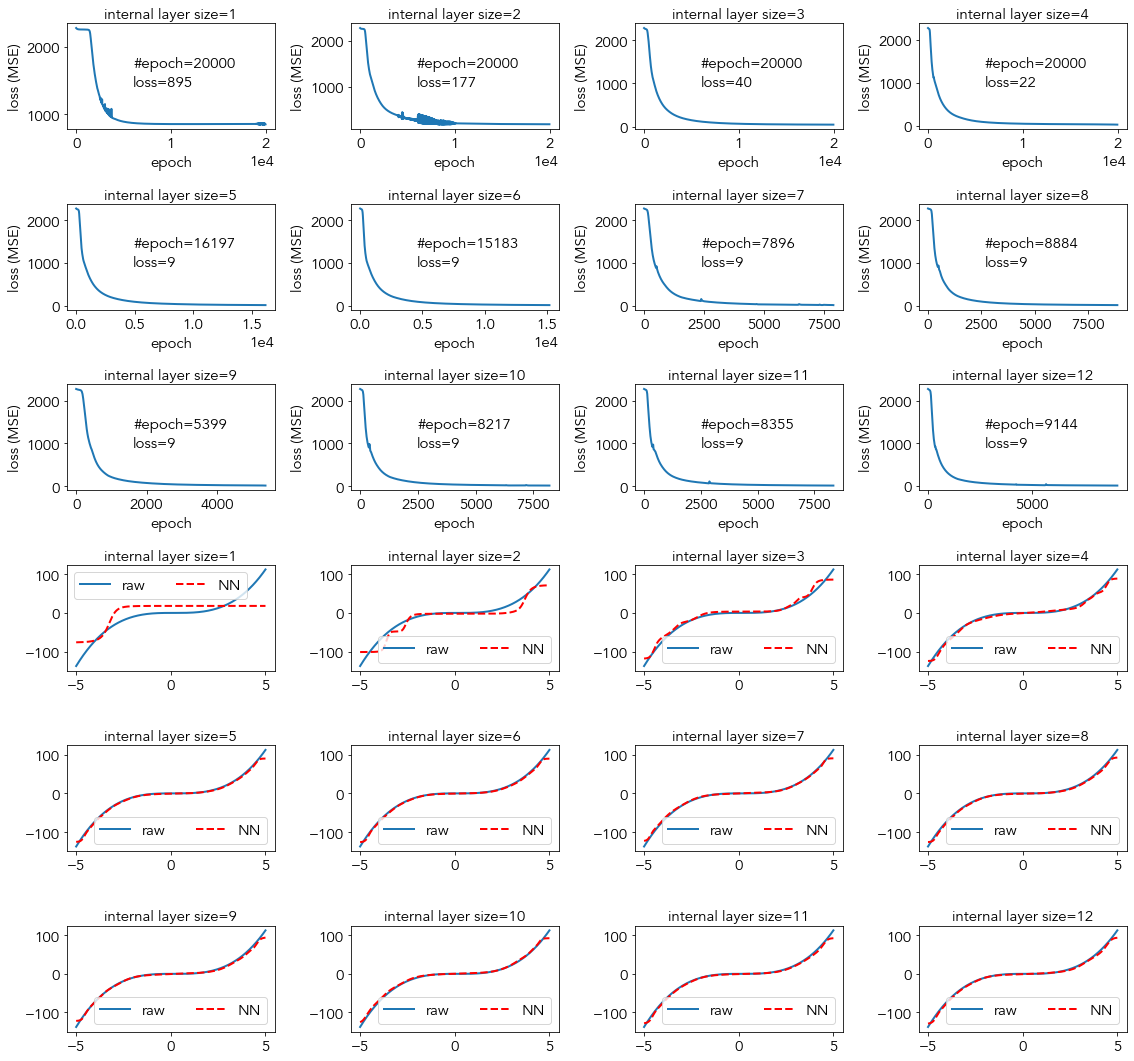

In [209]:
n_epoch_list3 = []

num_layers = 4;
learningRate = 0.002;
MAX_iter=20000;
plt.figure(figsize=(16,15))
for layers_size in range(1,13):
    print('layers_size='+str(layers_size))
    model=SigmoidalFeedForward(layers_size,num_layers)
    Loss = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
    tic=time.perf_counter()
    losses=[]
    n_epoch = MAX_iter;
    for ctr in range(MAX_iter):
        optimizer.zero_grad()
        outputs = model(inputs)
        lossvalue = Loss(outputs, labels)
        losses.append(lossvalue)
        if (lossvalue<10):
            n_epoch = ctr;
            break;
        else:
            lossvalue.backward()
            optimizer.step()
    print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))
    
    n_epoch_list3.append(n_epoch)
    xdata = np.arange(0,n_epoch,20);
    ydata = losses[::20];
    
    plt.subplot(6,4,layers_size)
    plt.title('internal layer size='+str(layers_size))
    plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
    plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
    plt.plot(xdata,ydata,**plotStyles)
    plt.xlabel('epoch')
    plt.ylabel('loss (MSE)')
    
    plt.subplot(6,4,12+layers_size)
    outputs=model(inputs)
    plt.plot(x,y,linewidth=2,label='raw')
    plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
    plt.legend(ncol=2)
    plt.title('internal layer size='+str(layers_size))
plt.tight_layout()

Text(0.5, 1.0, '#epochs needed to reach <10 loss')

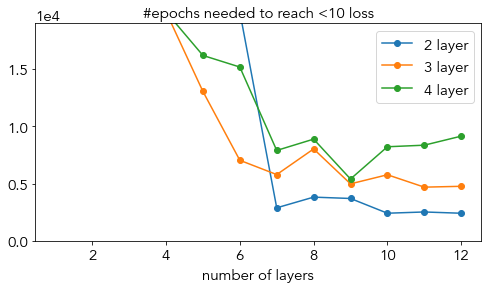

In [236]:
n_layers = np.arange(1,13,1)
plt.figure(figsize=(8,4))
plt.plot(n_layers,n_epoch_list,'o-',label='2 layer')
plt.plot(n_layers,n_epoch_list2,'o-',label='3 layer')
plt.plot(n_layers,n_epoch_list3,'o-', label='4 layer')
plt.ylim((0,19000))
plt.legend()
plt.xlabel('number of layers')
plt.title('#epochs needed to reach <10 loss')

## 3) explore number of layers and layer sizes with ReLU activation

In [219]:
class ReLuFeedForward(nn.Module): 
    def __init__(self,layers_size,num_layers): #default to one-dimensional feature and response
        super(ReLuFeedForward, self).__init__() #run init of torch.nn.Module
        self.layers_size = layers_size;
        self.num_layers = num_layers;
        self.layers = nn.ModuleList([nn.Linear(1, layers_size)])
        self.layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, self.num_layers-1)])
        self.layers.append(nn.Linear(layers_size, 1))
        self.relu=torch.nn.ReLU()

    def forward(self, x):
        out = x
        for i in range(len(self.layers)-1):
            out = self.layers[i](out)
            out=self.relu(out)
        out = self.layers[-1](out)
        return out

### test on 2-layer network

layers_size=1
#epoch=20000; loss=621
layers_size=2
#epoch=20000; loss=29
layers_size=3
#epoch=20000; loss=12
layers_size=4
#epoch=933; loss=9
layers_size=5
#epoch=20000; loss=11
layers_size=6
#epoch=674; loss=9
layers_size=7
#epoch=663; loss=9
layers_size=8
#epoch=787; loss=9
layers_size=9
#epoch=770; loss=9
layers_size=10
#epoch=666; loss=9
layers_size=11
#epoch=623; loss=9
layers_size=12
#epoch=657; loss=9


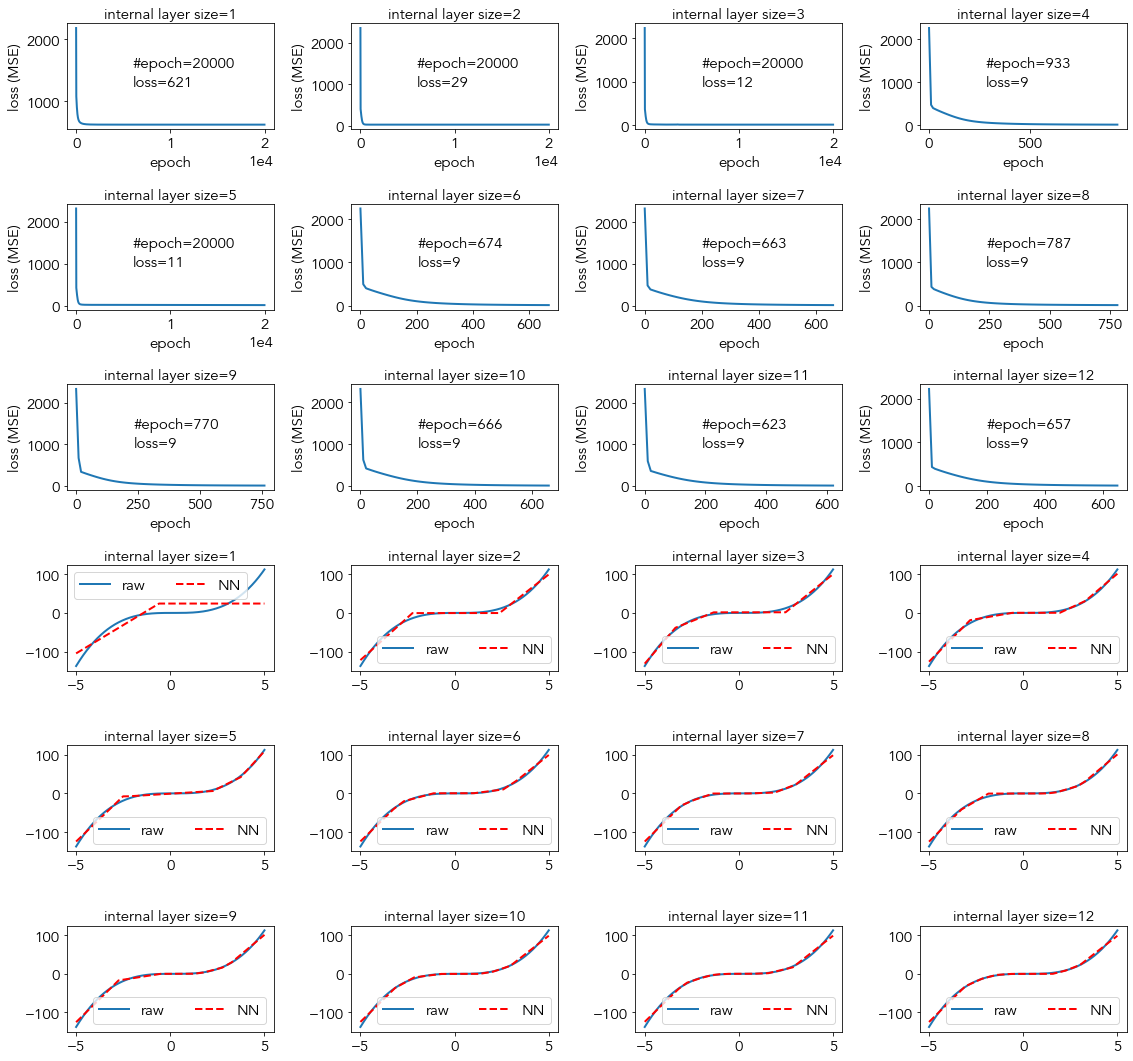

In [246]:
n_epoch_list4 = []

num_layers = 2;
learningRate = 0.002;
MAX_iter=20000;
plt.figure(figsize=(16,15))
for layers_size in range(1,13):
    print('layers_size='+str(layers_size))
    model=ReLuFeedForward(layers_size,num_layers)
    Loss = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
    tic=time.perf_counter()
    losses=[]
    n_epoch = MAX_iter;
    for ctr in range(MAX_iter):
        optimizer.zero_grad()
        outputs = model(inputs)
        lossvalue = Loss(outputs, labels)
        losses.append(lossvalue)
        if (lossvalue<10):
            n_epoch = ctr;
            break;
        else:
            lossvalue.backward()
            optimizer.step()
    print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))
    
    n_epoch_list4.append(n_epoch)
    xdata = np.arange(0,n_epoch,10);
    ydata = losses[::10];
    min_len = min(len(xdata),len(ydata))
    xdata = xdata[0:min_len]
    ydata = ydata[0:min_len]
    
    plt.subplot(6,4,layers_size)
    plt.title('internal layer size='+str(layers_size))
    plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
    plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
    plt.plot(xdata,ydata,**plotStyles)
    plt.xlabel('epoch')
    plt.ylabel('loss (MSE)')
    
    plt.subplot(6,4,12+layers_size)
    outputs=model(inputs)
    plt.plot(x,y,linewidth=2,label='raw')
    plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
    plt.legend(ncol=2)
    plt.title('internal layer size='+str(layers_size))
plt.tight_layout()

### test on 3-layer network

layers_size=1
#epoch=20000; loss=2259
layers_size=2
#epoch=20000; loss=1199
layers_size=3
#epoch=20000; loss=53
layers_size=4
#epoch=20000; loss=156
layers_size=5
#epoch=20000; loss=13
layers_size=6
#epoch=3457; loss=9
layers_size=7
#epoch=3012; loss=9
layers_size=8
#epoch=2540; loss=9
layers_size=9
#epoch=2349; loss=9
layers_size=10
#epoch=2834; loss=9
layers_size=11
#epoch=4680; loss=9
layers_size=12
#epoch=2334; loss=9


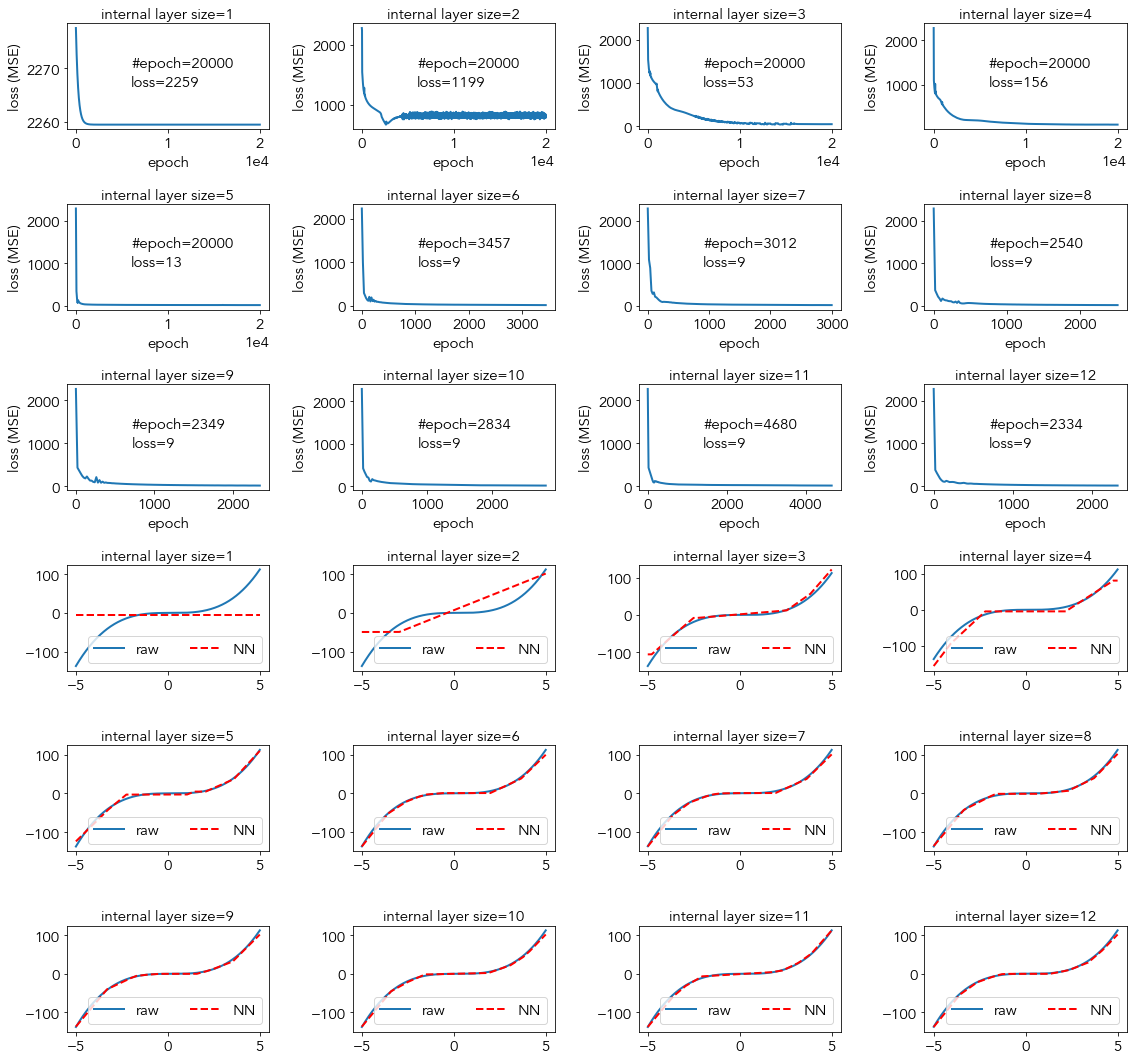

In [247]:
n_epoch_list5 = []

num_layers = 3;
learningRate = 0.001;
MAX_iter=20000;
plt.figure(figsize=(16,15))
for layers_size in range(1,13):
    print('layers_size='+str(layers_size))
    model=ReLuFeedForward(layers_size,num_layers)
    Loss = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
    tic=time.perf_counter()
    losses=[]
    n_epoch = MAX_iter;
    for ctr in range(MAX_iter):
        optimizer.zero_grad()
        outputs = model(inputs)
        lossvalue = Loss(outputs, labels)
        losses.append(lossvalue)
        if (lossvalue<10):
            n_epoch = ctr;
            break;
        else:
            lossvalue.backward()
            optimizer.step()
    print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))
    
    n_epoch_list5.append(n_epoch)
    xdata = np.arange(0,n_epoch,20);
    ydata = losses[::20];
    min_len = min(len(xdata),len(ydata))
    xdata = xdata[0:min_len]
    ydata = ydata[0:min_len]
    
    plt.subplot(6,4,layers_size)
    plt.title('internal layer size='+str(layers_size))
    plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
    plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
    plt.plot(xdata,ydata,**plotStyles)
    plt.xlabel('epoch')
    plt.ylabel('loss (MSE)')
    
    plt.subplot(6,4,12+layers_size)
    outputs=model(inputs)
    plt.plot(x,y,linewidth=2,label='raw')
    plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
    plt.legend(ncol=2)
    plt.title('internal layer size='+str(layers_size))
plt.tight_layout()

### test on 4-layer network

layers_size=1
#epoch=20000; loss=2259
layers_size=2
#epoch=20000; loss=2259
layers_size=3
#epoch=20000; loss=84
layers_size=4
#epoch=20000; loss=166
layers_size=5
#epoch=4072; loss=9
layers_size=6
#epoch=3729; loss=9
layers_size=7
#epoch=3544; loss=9
layers_size=8
#epoch=5423; loss=9
layers_size=9
#epoch=3818; loss=9
layers_size=10
#epoch=3032; loss=9
layers_size=11
#epoch=3341; loss=9
layers_size=12
#epoch=2952; loss=9


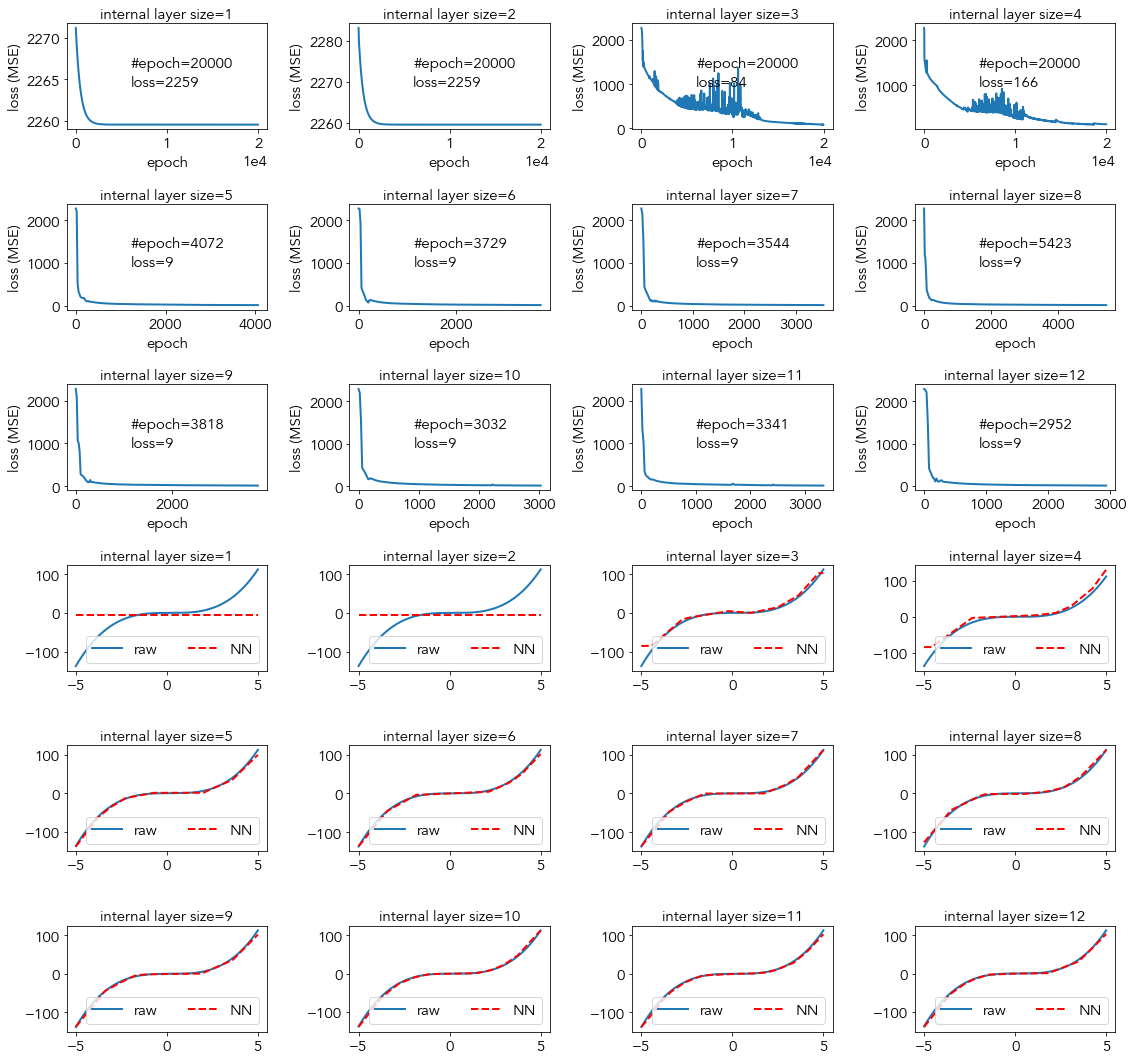

In [231]:
n_epoch_list6 = []

num_layers = 4;
learningRate = 0.0005;
MAX_iter=20000;
plt.figure(figsize=(16,15))
for layers_size in range(1,13):
    print('layers_size='+str(layers_size))
    model=ReLuFeedForward(layers_size,num_layers)
    Loss = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
    tic=time.perf_counter()
    losses=[]
    n_epoch = MAX_iter;
    for ctr in range(MAX_iter):
        optimizer.zero_grad()
        outputs = model(inputs)
        lossvalue = Loss(outputs, labels)
        losses.append(lossvalue)
        if (lossvalue<10):
            n_epoch = ctr;
            break;
        else:
            lossvalue.backward()
            optimizer.step()
    print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))
    
    n_epoch_list6.append(n_epoch)
    xdata = np.arange(0,n_epoch,20);
    ydata = losses[::20];
    min_len = min(len(xdata),len(ydata))
    xdata = xdata[0:min_len]
    ydata = ydata[0:min_len]
    
    plt.subplot(6,4,layers_size)
    plt.title('internal layer size='+str(layers_size))
    plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
    plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
    plt.plot(xdata,ydata,**plotStyles)
    plt.xlabel('epoch')
    plt.ylabel('loss (MSE)')
    
    plt.subplot(6,4,12+layers_size)
    outputs=model(inputs)
    plt.plot(x,y,linewidth=2,label='raw')
    plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
    plt.legend(ncol=2)
    plt.title('internal layer size='+str(layers_size))
plt.tight_layout()

Text(0.5, 1.0, '#epochs needed to reach < 10 loss')

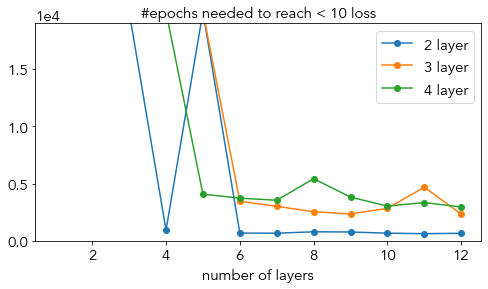

In [248]:
n_layers = np.arange(1,13,1)
plt.figure(figsize=(8,4))
plt.plot(n_layers,n_epoch_list4,'o-',label='2 layer')
plt.plot(n_layers,n_epoch_list5,'o-',label='3 layer')
plt.plot(n_layers,n_epoch_list6,'o-', label='4 layer')
plt.ylim((0,19000))
plt.legend()
plt.xlabel('number of layers')
plt.title('#epochs needed to reach < 10 loss')